# Info 3950 Problem Set 5

**due Fri evening 31 Mar 2023 23:00**

Remember to include your name and netid in the first cell. Submit via [gradescope](https://gradescope.com/).


<font size="-1">[Also note that these problem sets are not intended as group projects: the work you submit must be your own. You can discuss with other students at a high level, for example general methods or strategies to solve a problem, but you must cite the other student(s) in your submission. Any work you submit must be your own understanding of the solution, the details of which you personally and individually worked out, and written in your own words. In no cases should notebooks or code be shared.]</font>

In [ ]:
import nltk
from nltk.corpus import gutenberg
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from statistics import mode

## 1) Stylometrics

In lec 16 (see [lec16_sty.ipynb](https://nbviewer.jupyter.org/url/courses.cit.cornell.edu/info3950_2023sp/lec16_sty.ipynb)),
we saw how to dimensionally reduce 50 dimensional data to build a k-means classifier to distinguished two authors, Shakespeare and Milton.  The first objective here is to repeat those steps with two more authors from `nltk.corpus.gutenberg`: Austen and Melville.

[For this problem and the next, it's convenient to use the preprocessed nltk data, see
[nltk_data](http://www.nltk.org/data.html) for retrieval instructions.]

**A.** The remainder of this part follows the lec16_sty.ipynb code linked above to create objects
`top50`, `M`, `scaler`, `M_scaled`, `pca`, `M_new`, `km` analogous to those in the linked code.

In an analog of cell [7], add definitions to import words from the additional two files 'austen-persuasion.txt' and 'melville-moby_dick.txt'. The latter has over 200,000 words, so to keep it commensurate in size, it can be truncated to the first 80000 words. It will then contribute only 16 blocks (of 5000 words) to the training data, just as for Milton and Austen.

For features, use the list of top50 words from this set as in cell [9], but now from the four authors' texts. Then create an array `M4` as in cell [10] but for all four authors, so it will have 13 + 16 + 16 + 16 = 61 lines, each with 50 entries. Draw a plot, as in cell [12], of all 61 lines (using four separate colors).
Initialize a `scaler` and create an `M4_scaled` array, as in cell [13], then dimensionsionally reduce to 3 dimensions by modifying cell [15], and draw a 3d plot of the data points, as shown in the four author slide of [lec16_slides.pdf](https://courses.cit.cornell.edu/info3950_2023sp/lec16_slides.pdf).

**Added Notes:** For 3d, remember to use `ax.set_box_aspect((1,1,1))` so that the vertical dimension isn't squeezed. Also you don't need to put the words on the axes, you can just leave the numerical values.

In [8]:
authors = ['shakespeare','milton','austen','melville']

# from lec16_sty
shf = [fileid for fileid in gutenberg.fileids() if fileid.startswith('shakespeare')]
shw = [w.lower() for fileid in shf for w in gutenberg.words(fileid) if w[0].isalpha()]
mpw = [w.lower() for w in gutenberg.words('milton-paradise.txt') if w[0].isalpha()]
apw = [w.lower() for w in gutenberg.words('austen-persuasion.txt') if w[0].isalpha()]
mdw = [w.lower() for w in gutenberg.words('melville-moby_dick.txt') if w[0].isalpha()][:80000]

fdist = Counter(shw + mpw + apw + mdw)
top50_4,_ = zip(*fdist.most_common(50))


M4=[]
for corp in [shw, mpw, apw, mdw]:
    for i in range(0,len(corp)-4999,5000):
        fdist = Counter(corp[i:i+5000])
        M4.append([fdist[w] for w in top50_4])
M4 = np.array(M4).astype(np.float64)

scaler4 = preprocessing.StandardScaler()
M4_scaled = scaler4.fit_transform(M4)

pca4 = PCA(n_components=3) 
M4_new = pca4.fit_transform(M4_scaled)
# evr = pca4.explained_variance_ratio_
km4=KMeans(4, random_state=4).fit(M4_new)
means4=km4.cluster_centers_
labels_to_authors = {3:'shakespeare', 2:'milton', 1:'austen', 0:'melville'}

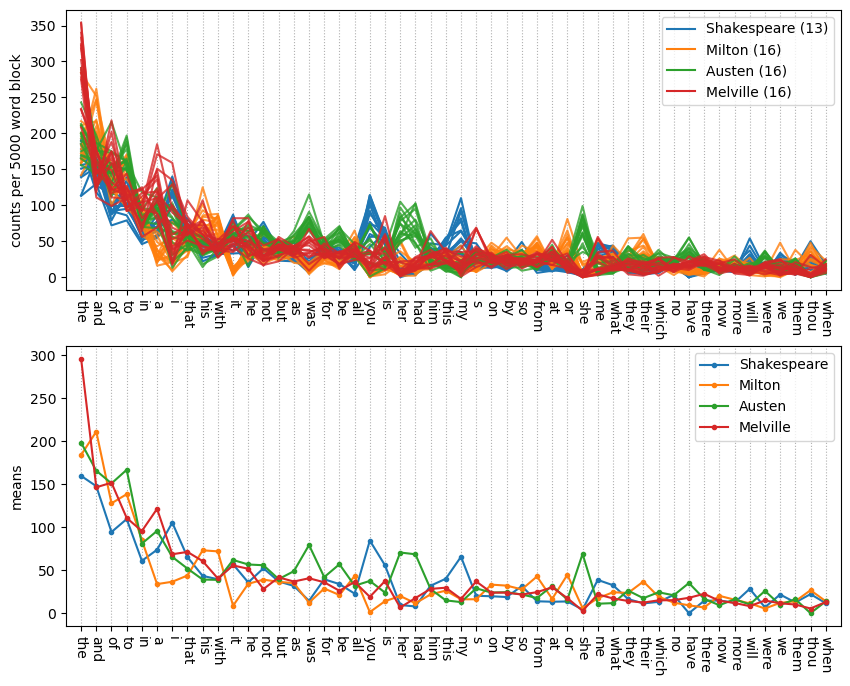

In [9]:
def plot_format(ylab=''):
    plt.xticks(range(50), top50_4, rotation=270)
    plt.xlim(-1,50)
    plt.grid(axis='x', linestyle='dotted')
    plt.ylabel(ylab)
    plt.legend()

plt.figure(figsize=(10,8))

plt.subplot(211)
plt.plot(M4[:13].T, 'C0') #shakespeare blocks in blue
plt.plot(M4[13:29].T, 'C1', alpha=.8) #milton blocks in orange
plt.plot(M4[29:45].T, 'C2', alpha=.8) #austen blocks in green
plt.plot(M4[45:].T, 'C3', alpha=.8) #melville blocks in red
plt.plot([-1],[100],label='Shakespeare (13)') # faux point for legend
plt.plot([-1],[100],label='Milton (16)')      # faux point for legend
plt.plot([-1],[100],label='Austen (16)') # faux point for legend
plt.plot([-1],[100],label='Melville (16)') # faux point for legend
plot_format('counts per 5000 word block')

plt.subplot(212)
plt.plot(M4[:13].mean(0), '.-', label='Shakespeare') #shakespeare blocks in blue
plt.plot(M4[13:29].mean(0), '.-', label='Milton') #milton blocks in orange
plt.plot(M4[29:45].mean(0), '.-', label='Austen') #austen blocks in green
plt.plot(M4[45:].mean(0), '.-', label='Melville') #melville blocks in red
plot_format('means')

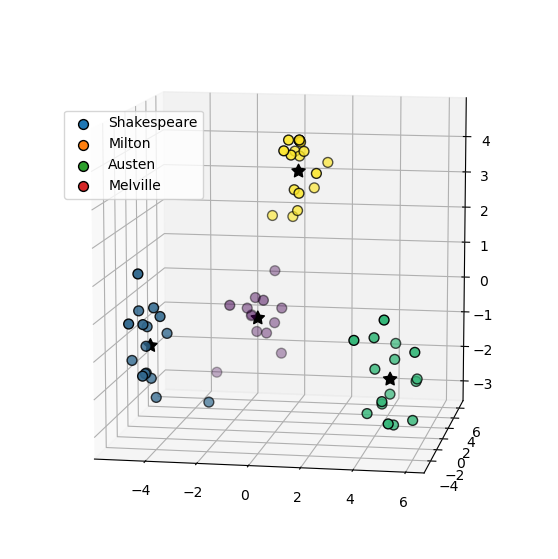

In [10]:
fig=plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d', elev=10, azim=-80)
ax.set_box_aspect((1,1,1))
ax.scatter(*M4_new.T,c=[0]*13 + [1]*16 + [2]*16 + [3]*16, edgecolors='black', s=50)
ax.scatter(*means4.T, c='black', marker=(5,1), s=100,alpha=1)

faux_x=M4_new[-1][0]
faux_y=M4_new[-1][1]
faux_z=M4_new[-1][2]

ax.scatter([faux_x],[faux_y],[faux_z],c='C0',s=50,edgecolors='black',label='Shakespeare') # faux point for legend
ax.scatter([faux_x],[faux_y],[faux_z],c='C1',s=50,edgecolors='black',label='Milton')      # faux point for legend
ax.scatter([faux_x],[faux_y],[faux_z],c='C2',s=50,edgecolors='black',label='Austen')      # faux point for legend
ax.scatter([faux_x],[faux_y],[faux_z],c='C3',s=50,edgecolors='black',label='Melville')    # faux point for legend

plt.legend(loc=(.1,.65));

**B.** Define a k-means classifier `km4` as in cell [19] but initialized to find 4 clusters.
Then see how it performs on some test data.
For test data, use: 1) the remaining portion of Melville (i.e., from word 80000 on, there should be 27 more blocks of 5000 words); 2) Also try the combined 'austen-emma.txt' and 'austen-sense.txt' (56 more blocks of 5000 words); 3) `nltk.corpus.shakespeare` contains five more Shakespeare plays (another 24 blocks of 5000 words, i.e., not counting caeser/hamlet/macbeth used above);  4) Also try some other Milton text, e.g., *Paradise Regained* from Gutenberg.org:

    from urllib.request import urlopen
    paradise_r_url = 'http://www.gutenberg.org/cache/epub/58/pg58.txt'
    paradise_r = urlopen(paradise_r_url).read().decode('utf-8')
    paradise_r_words = [w.lower() for w in nltk.word_tokenize(paradise_r[767:93590] if w[0].isalpha()])

That or any other texts from the web would have to be tokenized (see [nltk_ch02](http://www.nltk.org/book/ch02.html) re accessing web corpora), which can be done using tools from earlier exercises (e.g., the regular expression `[\w\']+`, though for consistency it makes more sense to continue using the nltk tool as above: `nltk.word_tokenize()` is described in [nltk_ch03](http://www.nltk.org/book/ch03.html), remember afterwards to lower case and remove punctuation). The above limits on `paradise_r` strip off the Gutenburg header/trailer material, leaving three 5000 words blocks.

See if any of the 27 + 56 + 24 + 3 = 110 blocks of test data are classified incorrectly by the k-means classifier, and redraw the plot above with the above points added (with smaller markersize for the test data, and colored according to their classification).

**Added note:** you should use the `scaler`, `pca`, and `km` as trained in part A, i.e., without retraining using the `.fit()` method, since they should depend only on the training data. This is as in cell [21] of lec16_sty.ipynb, where only the `.transform()` and `.predict()` methods are used.

In [5]:
from urllib.request import urlopen

In [6]:
# 1b. Test data

b1_test_w = [w.lower() for w in gutenberg.words('melville-moby_dick.txt') if w[0].isalpha()][80000:] # Melville
b2_test_w = [w.lower() for fileid in ['austen-emma.txt', 'austen-sense.txt'] for w in gutenberg.words(fileid) if w[0].isalpha()]
b3_test_fid = [fileid for fileid in nltk.corpus.shakespeare.fileids() if fileid not in ['macbeth.xml','hamlet.xml','j_caesar.xml']]
b3_test_w = [w.lower() for fileid in b3_test_fid for w in nltk.corpus.shakespeare.words(fileid) if w[0].isalpha()]
b4_test_url = 'http://www.gutenberg.org/cache/epub/58/pg58.txt' # paradise regained
b4_test_r = urlopen(b4_test_url).read().decode('utf-8')
b4_test_w = [w.lower() for w in nltk.word_tokenize(b4_test_r[767:93590]) if w[0].isalpha()]
test_w = [b1_test_w,b2_test_w,b4_test_w,b3_test_w]

M_test_true = np.concatenate([[n]*(len(i)//5000) for n,i in enumerate(test_w)])[::-1]
M_test=[]
for corp in [b3_test_w,b4_test_w,b2_test_w,b1_test_w]:
    for i in range(0,len(corp)-4999,5000):
        fdist = Counter(corp[i:i+5000])
        M_test.append([fdist[w] for w in top50_4])

M_test = np.array(M_test).astype(np.float64)
M_test_scaled = scaler4.transform(M_test)
M_test_new = pca4.transform(M_test_scaled)
M_test_preds = km4.predict(M_test_new)
M_test_c = [f'C{i}' for i in M_test_preds]

In [7]:
M_test_preds == M_test_true

True

`km4` correctly predicts all test data points

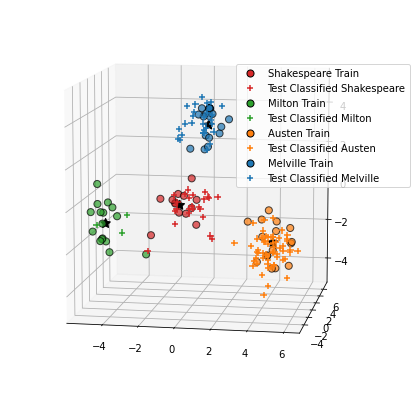

In [8]:
fig=plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d', elev=10, azim=-80)
ax.set_box_aspect((1,1,1))
ax.scatter(*M4_new.T,c=['C3']*13 + ['C2']*16 + ['C1']*16 + ['C0']*16, edgecolors='black', s=50, alpha=.7)
ax.scatter(*M_test_new.T, c=M_test_c, marker='+', edgecolors='black', s=40, alpha=1)
ax.scatter(*means4.T, c='black', marker=(5,1), s=100, alpha=1)

ax.scatter(faux_x,faux_y,faux_z,c='C3',            label='Shakespeare Train',           s=50, edgecolors='black')  # faux point for legend
ax.scatter(faux_x,faux_y,faux_z,c='C3',marker='+', label='Test Classified Shakespeare', s=35, edgecolors='black')  # faux point for legend
ax.scatter(faux_x,faux_y,faux_z,c='C2',            label='Milton Train',                s=50, edgecolors='black')  # faux point for legend
ax.scatter(faux_x,faux_y,faux_z,c='C2',marker='+', label='Test Classified Milton',      s=35, edgecolors='black')  # faux point for legend
ax.scatter(faux_x,faux_y,faux_z,c='C1',            label='Austen Train',                s=50, edgecolors='black')  # faux point for legend
ax.scatter(faux_x,faux_y,faux_z,c='C1',marker='+', label='Test Classified Austen',      s=35, edgecolors='black')  # faux point for legend
ax.scatter(faux_x,faux_y,faux_z,c='C0',            label='Melville Train',              s=50, edgecolors='black')  # faux point for legend
ax.scatter(faux_x,faux_y,faux_z,c='C0',marker='+', label='Test Classified Melville',    s=35, edgecolors='black')  # faux point for legend
plt.legend(loc=(.6,.525));   

**C.** As for the twelve Hamilton/Madison disputed essays of the [Federalist papers](https://en.wikipedia.org/wiki/The_Federalist_Papers) mentioned in Lec16, there is a posthumous dispute among some of the above four authors regarding this text: [ps5text1.zip](https://courses.cit.cornell.edu/info3950_2023sp/ps5text1.zip).

(i) Breaking it up into 5000 word blocks as above (you should find 35 blocks, remember again for consistency you should use `nltk.word_tokenize()` if you've been using it above, otherwise the regexp `[\w\']+` for all of parts A,B,C), determine the likely authorship of each of those blocks.

(ii) Make a plot as in part B, adding now the points representing these 35 blocks to another copy of the plot from part A.

In [9]:
# 1Ci)

c_text = open('ps5text1.txt','r').read()

c_test_w = [w.lower() for w in nltk.word_tokenize(c_text) if w[0].isalpha()]

C_test=[]

for i in range(0,len(c_test_w)-4999,5000):
    fdist = Counter(c_test_w[i:i+5000])
    C_test.append([fdist[w] for w in top50_4])
C_test = np.array(C_test).astype(np.float64)
C_test_scaled = scaler4.transform(C_test)
C_test_new = pca4.transform(C_test_scaled)
C_test_preds = km4.predict(C_test_new)
C_test_c = [f'C{i}' for i in C_test_preds]

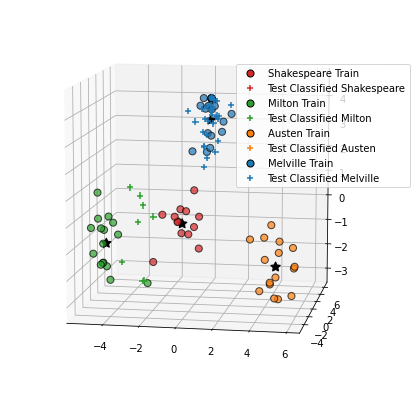

In [10]:
# 1Cii)

fig=plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d', elev=10, azim=-80)
ax.set_box_aspect((1,1,1))
ax.scatter(*M4_new.T,c=['C3']*13 + ['C2']*16 + ['C1']*16 + ['C0']*16, edgecolors='black', s=50, alpha=.7)
ax.scatter(*C_test_new.T, c=C_test_c, marker='+', edgecolors='black', s=40, alpha=1)
ax.scatter(*means4.T, c='black', marker=(5,1), s=100, alpha=1)

ax.scatter(faux_x,faux_y,faux_z,c='C3',            label='Shakespeare Train',           s=50, edgecolors='black')  # faux point for legend
ax.scatter(faux_x,faux_y,faux_z,c='C3',marker='+', label='Test Classified Shakespeare', s=35, edgecolors='black')  # faux point for legend
ax.scatter(faux_x,faux_y,faux_z,c='C2',            label='Milton Train',                s=50, edgecolors='black')  # faux point for legend
ax.scatter(faux_x,faux_y,faux_z,c='C2',marker='+', label='Test Classified Milton',      s=35, edgecolors='black')  # faux point for legend
ax.scatter(faux_x,faux_y,faux_z,c='C1',            label='Austen Train',                s=50, edgecolors='black')  # faux point for legend
ax.scatter(faux_x,faux_y,faux_z,c='C1',marker='+', label='Test Classified Austen',      s=35, edgecolors='black')  # faux point for legend
ax.scatter(faux_x,faux_y,faux_z,c='C0',            label='Melville Train',              s=50, edgecolors='black')  # faux point for legend
ax.scatter(faux_x,faux_y,faux_z,c='C0',marker='+', label='Test Classified Melville',    s=35, edgecolors='black')  # faux point for legend
plt.legend(loc=(.6,.525));   

**D.** now add a 20th century author Agatha Christie to the mix, for a total of five authors, using the same 61 blocks of training data as in **A.**, together with her "The Secret of Chimneys":

    chimneys_url = 'https://www.gutenberg.org/cache/epub/65238/pg65238.txt'
    chimneys = urlopen(chimneys_url).read().decode('utf-8')
    chimneys_words = [w.lower() for w in nltk.word_tokenize(chimneys[897:439351]) if w[0].isalpha()]
    
This should provide an additional fifteen 5000 word blocks of training data.
but in addition, since the vocabulary has been enlarged, increase to a new `top60` as the top 60 words used in the combined training corpora from the five authors.
The `M5` you create should have 61 + 15 = 76 lines of data, and hence a shape of (76,60).

Repeat the steps in parts **A,B** above but with a few differences:

i) After defining a new `scalar5` for this data, for the PCA use `pca5 = PCA(.74)`, which will use enough dimensions to provide at least 74% of the variance of the original data. Look at `pca5.explained_variance_ratio_` to see how many dimensions that is, and sum the variances to confirm they add up to greater than 74%

Now fit a full `PCA()` to the same data, and plot all sixty components of the full `.explained_variance_ratio_` to see roughly why the .74 threshold above was chosen.

In [11]:
authors = ['shakespeare','milton','austen','melville']

# from lec16_sty
shf = [fileid for fileid in gutenberg.fileids() if fileid.startswith('shakespeare')]
shw = [w.lower() for fileid in shf for w in gutenberg.words(fileid) if w[0].isalpha()]
mpw = [w.lower() for w in gutenberg.words('milton-paradise.txt') if w[0].isalpha()]
apw = [w.lower() for w in gutenberg.words('austen-persuasion.txt') if w[0].isalpha()]
mdw = [w.lower() for w in gutenberg.words('melville-moby_dick.txt') if w[0].isalpha()][:80000]
chimneys_url = 'https://www.gutenberg.org/cache/epub/65238/pg65238.txt'
chimneys = urlopen(chimneys_url).read().decode('utf-8')
chimneys_words = [w.lower() for w in nltk.word_tokenize(chimneys[897:439351]) if w[0].isalpha()]

fdist = Counter(shw + mpw + apw + mdw + chimneys_words)
top60_5,_ = zip(*fdist.most_common(60))



M5=[]
# M5_true_auth = []
for corp,label in zip([shw, mpw, apw, mdw, chimneys_words],['shw', 'mpw', 'apw', 'mdw', 'chimneys_words']):
    for i in range(0,len(corp)-4999,5000):
        fdist = Counter(corp[i:i+5000])
        M5.append([fdist[w] for w in top60_5])
#         M5_true_auth.append(label)

M5 = np.array(M5).astype(np.float64)

M5_w = [shw, mpw, apw, mdw, chimneys_words]
M5_true = np.concatenate([[n]*(len(i)//5000) for n,i in enumerate(M5_w)])


scaler5 = preprocessing.StandardScaler()
M5_scaled = scaler5.fit_transform(M5)

pca5 = PCA(.74)
M5_new = pca5.fit_transform(M5_scaled)
evr = pca5.explained_variance_ratio_

km5=KMeans(5, random_state=4, n_init='auto').fit(M5_new)
means5=km5.cluster_centers_

In [12]:
M5.shape, len(evr), sum(evr)

((76, 60), 8, 0.7452658458123996)

In [13]:
pca5_ = PCA()
M5_new_ = pca5_.fit_transform(M5_scaled)
evr_ = pca5_.explained_variance_ratio_

km5_= KMeans(5, random_state=4, n_init='auto').fit(M5_new_)
means5_ = km5_.cluster_centers_

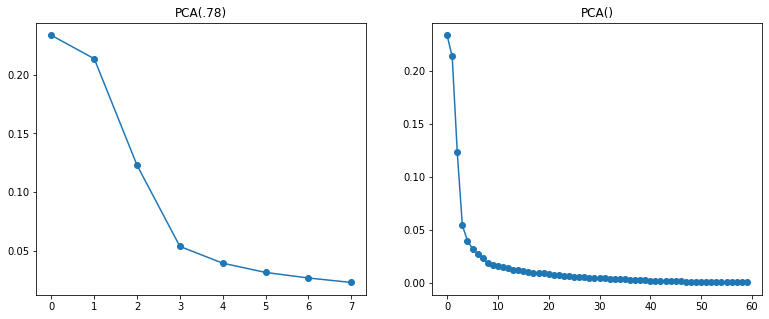

In [14]:
fig = plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
plt.title('PCA(.78)')
plt.plot(evr,marker='o')

plt.subplot(1,2,2)
plt.title('PCA()')
plt.plot(evr_, marker='o');

In [15]:
print(f'PCA(.78): evr={sum(evr)}\nPCA(): evr={sum(evr_)}')

PCA(.78): evr=0.7452658458123996
PCA(): evr=0.9999999999999997


ii) Define a `km5` with `k=5` clusters, on the `M5_new = pca5.fit_transform(M5_scaled)` data, meaning that the k-means will be trained on the higher dimensional data chosen by `pca5`.  Check its accuracy score on the training data.

In [16]:
# defined above, but again below:
km5_= KMeans(5, random_state=4, n_init='auto').fit(M5_new_)
means5_ = km5_.cluster_centers_

In [17]:
M5_unq_true_ind = np.unique(M5_true, return_index=True)[1]
M5_unq_true_counts = np.unique(M5_true, return_counts=True)[1]

M5_true_ = []
for i in range(1,len(M5_unq_true_ind)):
    M5_true_.append([mode(km5_.predict(M5_new_[M5_unq_true_ind[i-1]:M5_unq_true_ind[i]]))]*M5_unq_true_counts[i-1])
M5_true_.append([mode(km5_.predict(M5_new_[M5_unq_true_ind[-1]:]))]*M5_unq_true_counts[-1])
M5_true_ = np.concatenate(M5_true_)

print(f'Training Score: {(1-sum(km5_.predict(M5_new_) != M5_true_)/len(M5_true_))*100:.2f}%, or {len(M5_true_) - sum(km5_.predict(M5_new_) != M5_true_)}/{len(M5_true_)}.')

Training Score: 98.68%, or 75/76.


iii) Make both 2d and 3d plots of the five author data from `M5_new`. Although it is higher dimensional, you can plot just the first 2 or 3 components using `plt.scatter(*M5_new.T[:2])` or `ax.scatter(*M5_new.T[:3])`. For the fifth author, use the color `C6` (magenta-like). Also include the five k-means centers.

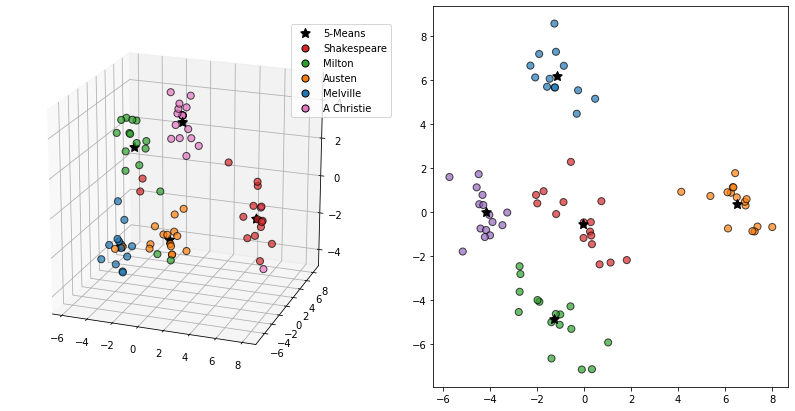

In [18]:
# 1Diii) 3d plot

colors = [f'C{i}' for i in M5_true][::-1]
colors = [colors[i] if colors[i]!='C4' else 'C6' for i in range(len(colors))]

fig=plt.figure(figsize=(14,7))
ax = fig.add_subplot(121, projection='3d', elev=20, azim=-70)
ax.set_box_aspect((1,1,1))
ax.scatter(*M5_new_.T[:3],c=colors, edgecolors='black', s=50,alpha=.7)
ax.scatter(*means5_.T[:3], c='black', marker=(5,1), s=100, alpha=1, label='5-Means')

ax.scatter(faux_x,faux_y,faux_z,c='C3',label='Shakespeare', s=50, edgecolors='black')    # faux point for legend
ax.scatter(faux_x,faux_y,faux_z,c='C2',label='Milton',      s=50, edgecolors='black')    # faux point for legend
ax.scatter(faux_x,faux_y,faux_z,c='C1',label='Austen',      s=50, edgecolors='black')    # faux point for legend
ax.scatter(faux_x,faux_y,faux_z,c='C0',label='Melville',    s=50, edgecolors='black')    # faux point for legend
ax.scatter(faux_x,faux_y,faux_z,c='C6',label='A Christie',  s=50, edgecolors='black')  # faux point for legend

plt.legend(loc=(.8,.725));


# 1Diii) 2d plot

fig.add_subplot(122)
colors = [f'C{i}' for i in M5_true]
plt.scatter(*M5_new_.T[:2],c=colors, edgecolors='black', s=50,alpha=.7)
plt.scatter(*means5_.T[:2], c='black', marker=(5,1), s=100, alpha=1, label='5-Means');

iv) Now add to the 110 test points used in part B additional test points for the fifth author taken from her "Murder on the Links":

`links_url = 'https://www.gutenberg.org/cache/epub/58866/pg58866.txt'
links = urlopen(links_url).read().decode('utf-8')
links_words = [w.lower() for w in nltk.word_tokenize(links[829:373271]) if w[0].isalpha()]`

This should provide an additional 12 blocks for a total of 122 together with the earlier. Again use the scalar5() and pca5 fitted to only the training data to transform these points into the pca-reduced dimension space. What is the km5 test score?

Add these test points as well to the 2d and 3d plots of the training points in part C.

In [19]:
# 1Div.

links_url = 'https://www.gutenberg.org/cache/epub/58866/pg58866.txt'
links = urlopen(links_url).read().decode('utf-8')
links_words = [w.lower() for w in nltk.word_tokenize(links[829:373271]) if w[0].isalpha()]
test_w = [links_words, b1_test_w,b2_test_w,b4_test_w,b3_test_w]
M_test_true = np.concatenate([[n]*(len(i)//5000) for n,i in enumerate(test_w)])[::-1]

M_test=[]
for corp in [b3_test_w,b4_test_w,b2_test_w,b1_test_w, links_words]:
    for i in range(0,len(corp)-4999,5000):
        fdist = Counter(corp[i:i+5000])
        M_test.append([fdist[w] for w in top60_5])

M_test = np.array(M_test).astype(np.float64)
M_test_scaled = scaler5.transform(M_test)
M_test_new = pca5.transform(M_test_scaled)
M_test_preds = km5.predict(M_test_new)
M_test_c = [f'C{i+5}' for i in M_test_preds]

M_unq_true_ind = np.unique(M_test_true, return_index=True)[1][::-1]
M_unq_true_counts = np.unique(M_test_true, return_counts=True)[1][::-1]

M_true = []
for i in range(1,len(M_unq_true_ind)):
    M_true.append([mode(km5.predict(M_test_new[M_unq_true_ind[i-1]:M_unq_true_ind[i]]))]*M_unq_true_counts[i-1])
M_true.append([mode(km5.predict(M_test_new[M_unq_true_ind[-1]:]))]*M_unq_true_counts[-1])
M_true = np.concatenate(M_true)

print(f'Test Score: {(1-sum(km5.predict(M_test_new) != M_true)/len(M_true))*100:.2f}%, or {len(M_true) - sum(km5.predict(M_test_new) != M_true)}/{len(M_true)}.')

Test Score: 100.00%, or 122/122.


`km5` correctly predicts all test data points. Test score 100%

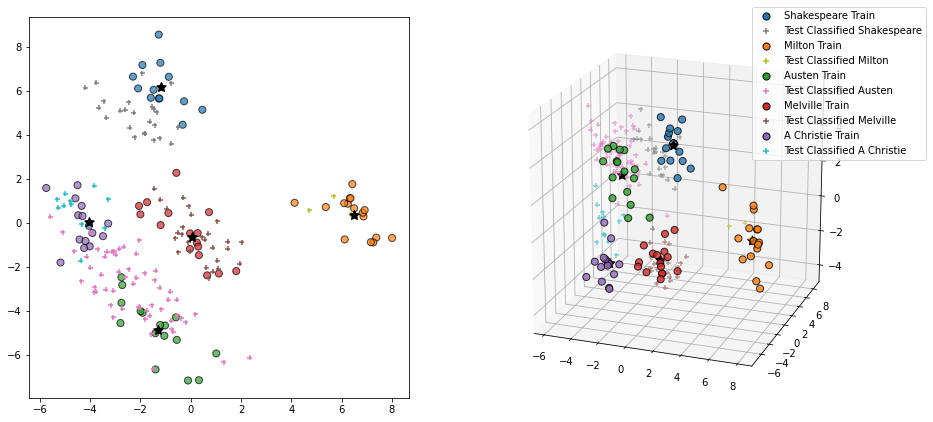

In [20]:
fig=plt.figure(figsize=(15,7))
ax = fig.add_subplot(122, projection='3d', elev=20, azim=-70)
ax.set_box_aspect((1,1,1))
ax.scatter(*M5_new.T[:3],c=colors, edgecolors='black', s=50, alpha=.8)
ax.scatter(*M_test_new.T[:3], c=M_test_c, marker='+', edgecolors='black', s=25, alpha=.6)
ax.scatter(*means5.T[:3], c='black', marker=(5,1), s=100, zorder=2, alpha=1)

ax.scatter(faux_x,faux_y,faux_z,c='C0',            label='Shakespeare Train',           s=50, edgecolors='black')  # faux point for legend
ax.scatter(faux_x,faux_y,faux_z,c='C7',marker='+', label='Test Classified Shakespeare', s=35, edgecolors='black')  # faux point for legend
ax.scatter(faux_x,faux_y,faux_z,c='C1',            label='Milton Train',                s=50, edgecolors='black')  # faux point for legend
ax.scatter(faux_x,faux_y,faux_z,c='C8',marker='+', label='Test Classified Milton',      s=35, edgecolors='black')  # faux point for legend
ax.scatter(faux_x,faux_y,faux_z,c='C2',            label='Austen Train',                s=50, edgecolors='black')  # faux point for legend
ax.scatter(faux_x,faux_y,faux_z,c='C6',marker='+', label='Test Classified Austen',      s=35, edgecolors='black')  # faux point for legend
ax.scatter(faux_x,faux_y,faux_z,c='C3',            label='Melville Train',              s=50, edgecolors='black')  # faux point for legend
ax.scatter(faux_x,faux_y,faux_z,c='C5',marker='+', label='Test Classified Melville',    s=35, edgecolors='black')  # faux point for legend
ax.scatter(faux_x,faux_y,faux_z,c='C4',            label='A Christie Train',            s=50, edgecolors='black')  # faux point for legend
ax.scatter(faux_x,faux_y,faux_z,c='C9',marker='+', label='Test Classified A Christie',  s=35, edgecolors='black')  # faux point for legend
plt.legend(loc=(.7,.625)); 

fig.add_subplot(121)
plt.scatter(*M5_new.T[:2],c=colors, edgecolors='black', s=50,alpha=.7)
plt.scatter(*M_test_new.T[:2],c=M_test_c, marker='+', edgecolors='black', s=25,alpha=1)
plt.scatter(*means5.T[:2], c='black', marker=(5,1), s=100, alpha=1, label='5-Means');


v) There is an additional posthumous dispute among some of these five authors regarding this text: [ps5text2.zip](https://courses.cit.cornell.edu/info3950_2023sp/ps5text2.zip).<br>
Breaking it up into 5000 word blocks as above (you should find 33 of them), determine the likely authorship of each of those blocks.

Make 2d and 3d plots as in part iv, only now adding the points representing these 35 blocks, and a line connecting them, to another copy of the plots from part iii. It might look something like the below (plotted using fmt '.-', except of course the lines aren't accurate and the training points and 5-means centers need to be added).

In [21]:
from mpl_toolkits.mplot3d import Axes3D

In [22]:
Dv_text = open('ps5text2.txt','r').read()
Dv_test_w = [w.lower() for w in nltk.word_tokenize(Dv_text) if w[0].isalpha()]

Dv_test_=[]

for i in range(0,len(Dv_test_w)-4999,5000):
    fdist = Counter(Dv_test_w[i:i+5000])
    Dv_test_.append([fdist[w] for w in top60_5])
Dv_test_ = np.array(Dv_test_).astype(np.float64)
Dv_test_scaled = scaler5.transform(Dv_test_)
Dv_test_new = pca5.transform(Dv_test_scaled)

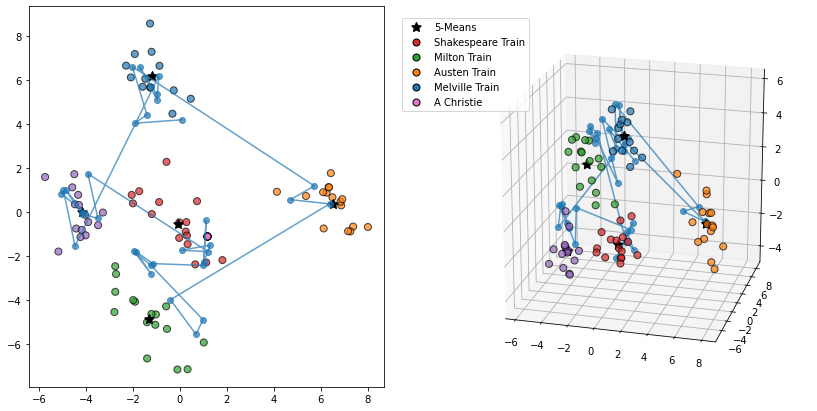

In [23]:
# 1Dv)

colors = [f'C{i}' for i in M5_true]
fig=plt.figure(figsize=(14,7))
ax = fig.add_subplot(122, projection='3d', elev=20, azim=-75)
ax.set_box_aspect((1,1,1))
ax.scatter(*M5_new.T[:3],c=colors, edgecolors='black', s=50,alpha=.7)
ax.plot(*Dv_test_new.T[:3],marker='o',alpha=.7)
ax.scatter(*means5_.T[:3], c='black', marker=(5,1), s=100, alpha=1, label='5-Means')

fig.add_subplot(121)
plt.scatter(*M5_new.T[:2],c=colors, edgecolors='black', s=50,alpha=.7)
plt.plot(*Dv_test_new.T[:2],marker='o',alpha=.7)
plt.scatter(*means5_.T[:2], c='black', marker=(5,1), s=100, alpha=1, label='5-Means')

plt.scatter(faux_x,faux_y,c='C3',label='Shakespeare Train', s=50, edgecolors='black')  # faux point for legend
plt.scatter(faux_x,faux_y,c='C2',label='Milton Train',      s=50, edgecolors='black')  # faux point for legend
plt.scatter(faux_x,faux_y,c='C1',label='Austen Train',      s=50, edgecolors='black')  # faux point for legend
plt.scatter(faux_x,faux_y,c='C0',label='Melville Train',    s=50, edgecolors='black')  # faux point for legend
plt.scatter(faux_x,faux_y,c='C6',label='A Christie',        s=50, edgecolors='black')  # faux point for legend
plt.legend(loc=(1.05,.725));   

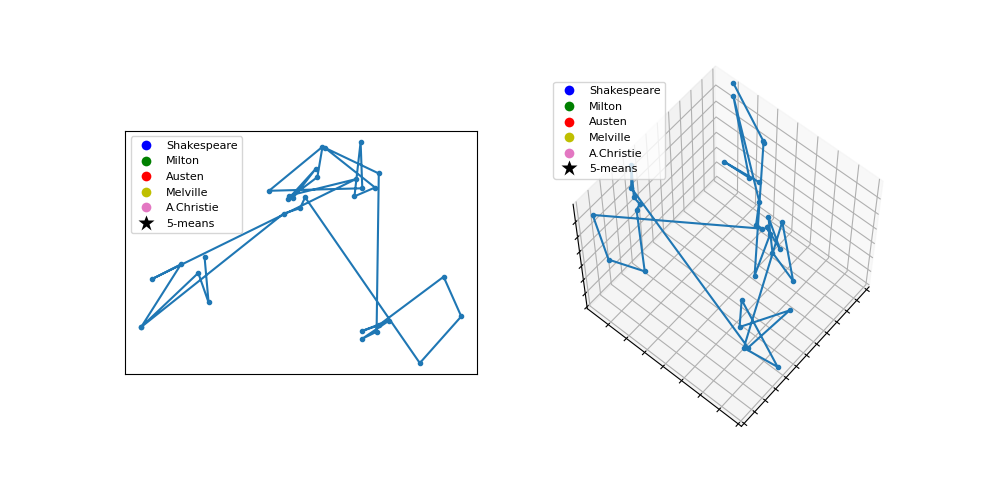

In [1]:
from IPython.display import Image
Image('5D.png')